# Ejercicio 1: Análisis de señales usando la FFT

Para este ejercicio considere la señal adjunta guardada en el archivo `elefante-ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as sfft
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

La señal tiene 2000 muestras.

Su duración o largo temporal es de 20.0 segundos.

Según el teorema del muestreo de Nyquist:
- la frecuencia más alta tiene que ser menor a la frecuencia de muestreo dividido en 2, por lo tanto,
- si tenemos que la frecuencia de muestreo es 100[Hz], la mayor frecuencia que podremos estudiar será 50[Hz].

Según los comportamientos de la señal observados podemos clasificarla según: 
- el tipo de variable: es una señal de variable independiente discreta y variable dependiente cuantizada/digital. 
- su naturaleza: es una señal determinista ya que se podría describir mediante una ecuación matemática.



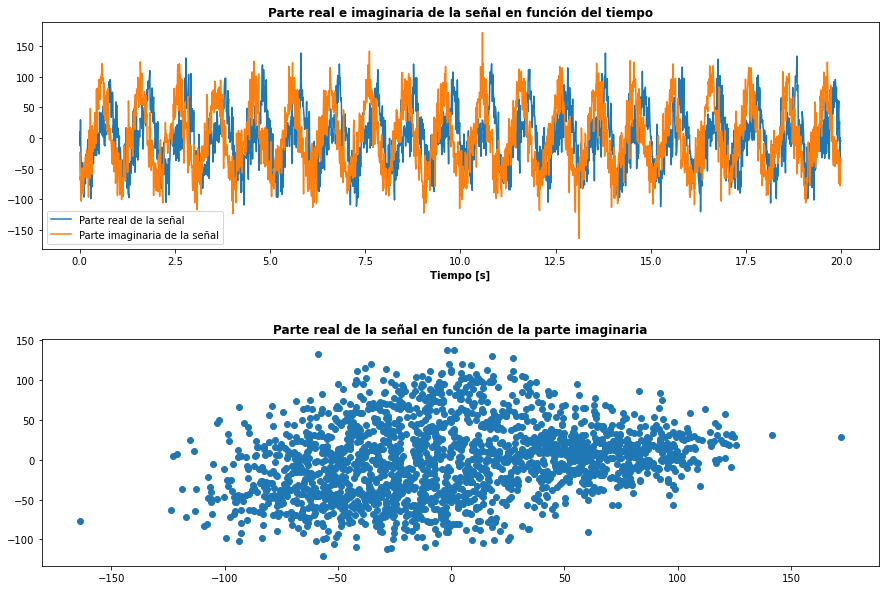

In [16]:
fs = 100#frecuencia de muestreo
st = 1.0 / fs
n = len(x) #Cantidad de muestras de la señal
duration = n/fs #duración temporal de la señal
t = np.arange(0.0, duration, step = st) #tiempo [s]

print("La señal tiene", n, "muestras.\n")
print("Su duración o largo temporal es de", duration, "segundos.\n")
print("Según el teorema del muestreo de Nyquist:\n- la frecuencia más alta tiene que ser menor a la frecuencia de muestreo dividido en 2, por lo tanto,\n- si tenemos que la frecuencia de muestreo es 100[Hz], la mayor frecuencia que podremos estudiar será 50[Hz].\n")
print("Según los comportamientos de la señal observados podemos clasificarla según: \n- el tipo de variable: es una señal de variable independiente discreta y variable dependiente cuantizada/digital. \n- su naturaleza: es una señal determinista ya que se podría describir mediante una ecuación matemática.\n")

fig, ax = plt.subplots(2, figsize=(15, 10))

#Graficamos la parte real e imaginaria de la señal vs tiempo
ax[0].set_title("Parte real e imaginaria de la señal en función del tiempo", fontweight='bold')
ax[0].set_xlabel('Tiempo [s]', fontweight='bold')
ax[0].plot(t, np.real(x), label='Parte real de la señal')
ax[0].plot(t, np.imag(x), label='Parte imaginaria de la señal')
ax[0].legend()

#Graficamos la parte real de la señal vs la parte imaginaria
ax[1].set_title("Parte real de la señal en función de la parte imaginaria", fontweight='bold')
ax[1].scatter(np.imag(x), np.real(x))

plt.subplots_adjust(hspace= 0.4)

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


En el gráfico de espectro de amplitud en función de la frecuencia podemos ver las distintas amplitudes que sobresalen
de las otras al ser evidentemente más grandes y observamos al menos 7 amplitudes más grandes que el resto.

En el gráfico de espectro de fase en función de la frecuencia podemos ver que no se logra distinguir del todo algún ángulo de fase que tenga una frecuencia más grande que otro.


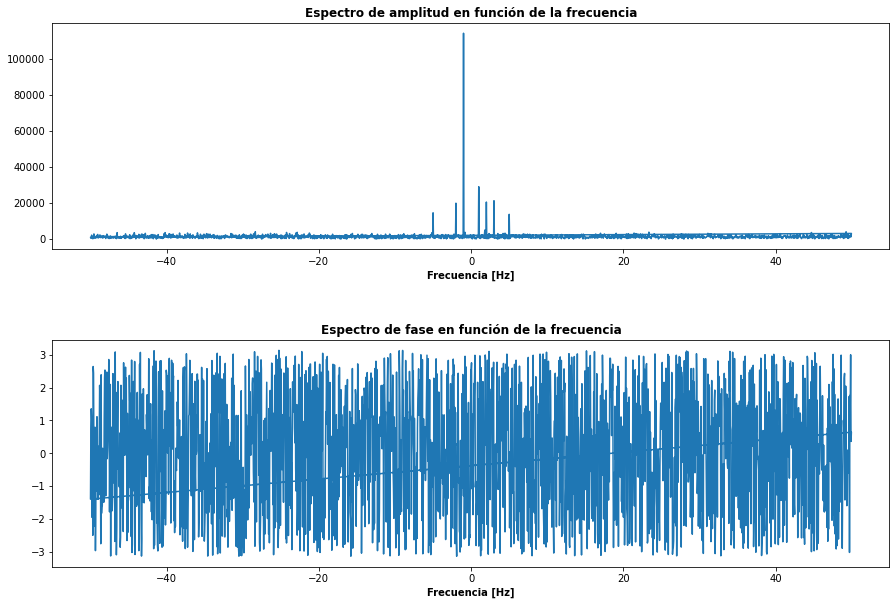

In [11]:
#Función que retorna frecuencia, espectro de amplitud y espectro de fase
def spectrum(x, fs):
    f = sfft.fftfreq(len(x), d=1/fs) #frecuencia
    S = sfft.fft(x) #aplicamos la transformada de fourier a la señal
    return f, np.absolute(S), np.angle(S)

f, SA, SP = spectrum(x, fs)
#f: frecuencias asociadas a la señal
#SA: espectro de amplitud
#SP: espectro de fase

fig, ax = plt.subplots(2, figsize=(15, 10))

#Graficamos el espectro de amplitud vs frecuencia
ax[0].set_title("Espectro de amplitud en función de la frecuencia", fontweight='bold')
ax[0].set_xlabel('Frecuencia [Hz]', fontweight='bold')
ax[0].plot(f, SA);

#Graficamos el espectro de fase vs frecuencia
ax[1].set_title("Espectro de fase en función de la frecuencia", fontweight='bold')
ax[1].set_xlabel('Frecuencia [Hz]', fontweight='bold')
ax[1].plot(f, SP);

plt.subplots_adjust(hspace= 0.4)

print("En el gráfico de espectro de amplitud en función de la frecuencia podemos ver las distintas amplitudes que sobresalen\nde las otras al ser evidentemente más grandes y observamos al menos 7 amplitudes más grandes que el resto.\n")
print("En el gráfico de espectro de fase en función de la frecuencia podemos ver que no se logra distinguir del todo algún ángulo de fase que tenga una frecuencia más grande que otro.")

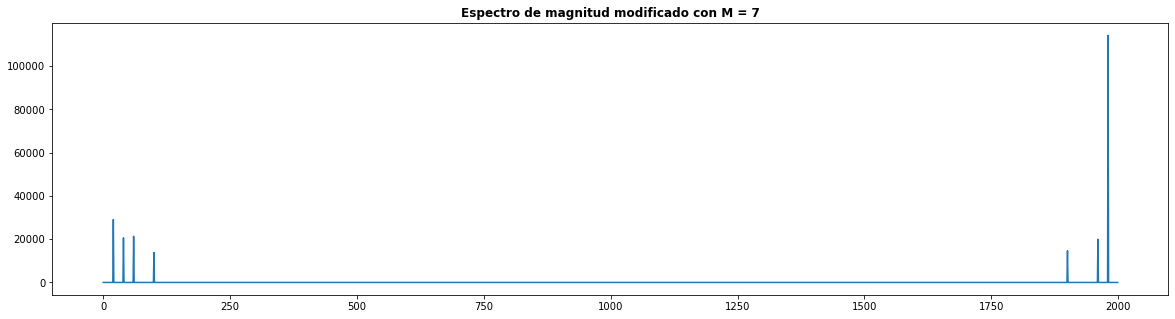

In [12]:
#Función que retorna el espectro de magnitud modificado con M y sus índices
def spectrum_mod(M, SA):
    SA_mod = SA.copy() #espectro de magnitud modificado
    
    aux1 = SA.copy() #copiamos el array para ordenarlo y conseguir los valores más grandes
    aux1.sort()
    
    aux2 = [] #contiene los M valores más grandes
    index = [] #contiene los índices de los M valores más grandes
    flag = True
    
    for i in range(M):
        aux2.append(aux1[len(aux1)-i-1])
    
    for i in range(len(SA_mod)):
        for j in  range(M):
            if SA_mod[i] == aux2[j]:
                index.append(i)
                flag = False
                
        if flag:
            SA_mod[i] = 0;
        flag = True
        
    return index, SA_mod

#Le asignamos un valor a M, en este caso M = 7
M = 7

index, SA_mod = spectrum_mod(M, SA)
#index: índices de los M valores más grandes
#SA_Mod: espectro modificado con M

fig, ax = plt.subplots(figsize=(20, 5))

#Gráficamos el espectro de magnitud modificado
ax.set_title('Espectro de magnitud modificado con M = %i'%M, fontweight='bold')
ax.plot(SA_mod);

In [13]:
#Ordenamos los M componentes en orden descendente según el espectro de amplitud
n = len(index);
for i in range(n):
    for j in range(0, n-i-1):
        if SA_mod[index[j]] < SA_mod[index[j+1]]: 
                index[j], index[j+1] = index[j+1], index[j];

#Imprimimos los datos (frecuencia, amplitud y fase) con el M escogido, en este caso M = 7
print('Datos de los', M ,'componentes del espectro más grandes:')
print()
headers = [['Índice', 'Frecuencia', 'Amplitud', 'Fase',]]
for i in headers:
        print("{: >15} {: >20} {: >20} {: >23}".format(*i))
print("-------------------------------------------------------------------------------------------")
for i in index:
    data = [[i, f[i], SA_mod[i], SP[i]],]
    for j in data:
        print("{: >15} {: >20} {: >25} {: >25}".format(*j))

Datos de los 7 componentes del espectro más grandes:

         Índice           Frecuencia             Amplitud                    Fase
-------------------------------------------------------------------------------------------
           1980                 -1.0        114172.07496405445       -1.2988694557983236
             20                  1.0        29095.711084968076       -2.8286161094867093
             60                  3.0         21326.97306032803       -3.0399687348263478
             40                  2.0         20598.95161543908        1.1360540070406129
           1960                 -2.0         19964.34184965835       -1.9964989591343765
           1900                 -5.0        14630.202810017134       0.10721681906939265
            100                  5.0        13788.414604929732       0.04120390089895237


## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

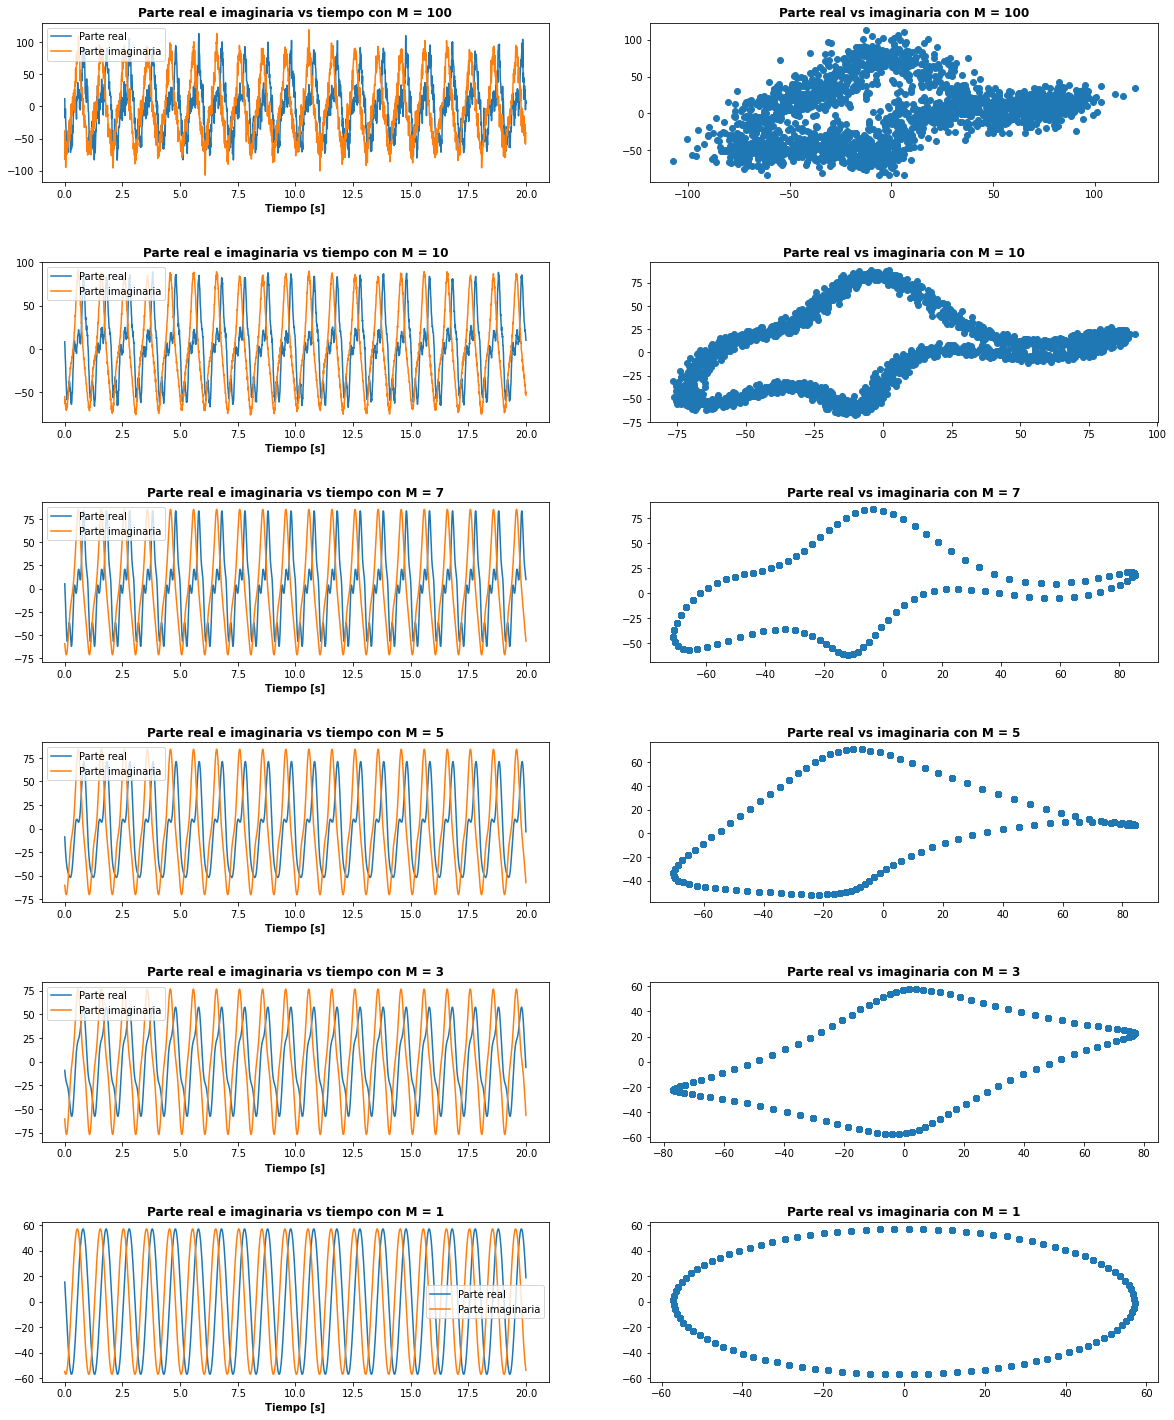

In [14]:
#Función que grafica la señal reconstruida con distintos valores de M
def graph(x, fs, t, i, M):
    f, SA, SP = spectrum(x, fs)
    index, SA_mod = spectrum_mod(M, SA)
    
    #SA_mod: espectro de amplitud modificado con M
    #SP: espectro de fase
    
    #Reconstruimos la señal usando la transformada de fourier inversa con los espectros de amplitud y fase modificados en base a M
    c = sfft.ifft(SA_mod*np.exp(1j*SP))
    
    #Graficamos la parte real e imaginaria de la señal en función del tiempo
    ax[i][0].set_title('Parte real e imaginaria vs tiempo con M = %i'%M, fontweight='bold')
    ax[i][0].set_xlabel('Tiempo [s]', fontweight='bold')
    ax[i][0].plot(t, np.real(c), label='Parte real')
    ax[i][0].plot(t, np.imag(c), label='Parte imaginaria')
    ax[i][0].legend()
    
    #Graficamos la parte real de la señal en función de la imaginaria
    ax[i][1].set_title('Parte real vs imaginaria con M = %i'%M, fontweight='bold')
    ax[i][1].scatter(np.imag(c), np.real(c))

_, ax = plt.subplots(6, 2, figsize=(20,25))
plt.subplots_adjust(hspace= 0.5)

#Graficamos para los distintos valores de M = [100, 10, 7, 5, 3, 1]
graph(x, st, t, 0, 100) #M = 100
graph(x, st, t, 1, 10)  #M = 10
graph(x, st, t, 2, 7)   #M = 7
graph(x, st, t, 3, 5)   #M = 5 
graph(x, st, t, 4, 3)   #M = 3
graph(x, st, t, 5, 1)   #M = 1

In [17]:
print("Para M = 100 vemos que sólo hay una leve diferencia de ruido (en el centro sobretodo) con respecto al caso original M = len(x).\n")

print("Para M = 10 observamos la figura con forma del elefante pero aún se aprecia mucho ruido en los bordes. A diferencia de M = len(x), el centro ya no tiene tanto ruido.\n")

print("Para M = 7 ya podemos observar con claridad la figura con forma de elefante sin tanto ruido en los bordes. A diferencia del caso original, la figura ya no tiene ruido en el centro.\n")

print("Para M = 5 la figura se comienza a deformar, sobre todo en la trompa y en las patas del elefante. Ya no se observa ruido en el centro de la figura a diferencia del caso original.\n")

print("Para M = 3 la forma de elefante se deforma aún más y se observa una figura con forma de rombo o paralelepípedo.\n")

print("Para M = 1 la figura se deformó completamente y sólo vemos una figura con forma ovalada.\n")

print("Podemos concluir que con:")
print(" - M > 7: la figura va generando más ruido en el centro y se va pareciendo más a la original (una nube de ruido).")
print(" - M = 7: logramos distinguir el elefante con claridad.")
print(" - M < 7: se comienza a deformar el elefante hasta que se forma una figura ovalada en M = 1.")

Para M = 100 vemos que sólo hay una leve diferencia de ruido (en el centro sobretodo) con respecto al caso original M = len(x).

Para M = 10 observamos la figura con forma del elefante pero aún se aprecia mucho ruido en los bordes. A diferencia de M = len(x), el centro ya no tiene tanto ruido.

Para M = 7 ya podemos observar con claridad la figura con forma de elefante sin tanto ruido en los bordes. A diferencia del caso original, la figura ya no tiene ruido en el centro.

Para M = 5 la figura se comienza a deformar, sobre todo en la trompa y en las patas del elefante. Ya no se observa ruido en el centro de la figura a diferencia del caso original.

Para M = 3 la forma de elefante se deforma aún más y se observa una figura con forma de rombo o paralelepípedo.

Para M = 1 la figura se deformó completamente y sólo vemos una figura con forma ovalada.

Podemos concluir que con:
 - M > 7: la figura va generando más ruido en el centro y se va pareciendo más a la original (una nube de ruido).

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente